# Example 1 - 

In [1]:
from openpile.construct import Pile

# Create a pile instance with two sections of respectively 10m and 30m length.
pile = Pile(
    name="",
    kind="Circular",
    material="Steel",
    top_elevation=0,
    pile_sections={
        "length": [10, 30],
        "diameter": [7.5, 7.5],
        "wall thickness": [0.07, 0.08],
    },
)
print(pile)
# Override young's modulus
pile.E = 250e6
# Check young's modulus (value in kPa)
print(pile.E)
# Override second moment of area across first section [in meters^4]
pile.set_I(value=1.11, section=1)
# Check updated second moment of area
print(pile)
# Override pile's width or pile's diameter [in meters]
pile.width = 2.22
# Check updated width or diameter
print(pile)
# Override pile's area  [in meters^2]
pile.area = 1.0


   Elevation [m]  Diameter [m]  Wall thickness [m]  Area [m2]     I [m4]
0            0.0           7.5                0.07   1.633942  11.276204
1          -10.0           7.5                0.07   1.633942  11.276204
2          -10.0           7.5                0.08   1.864849  12.835479
3          -40.0           7.5                0.08   1.864849  12.835479
250000000.0
   Elevation [m]  Diameter [m]  Wall thickness [m]  Area [m2]     I [m4]
0            0.0           7.5                0.07   1.633942   1.110000
1          -10.0           7.5                0.07   1.633942   1.110000
2          -10.0           7.5                0.08   1.864849  12.835479
3          -40.0           7.5                0.08   1.864849  12.835479
   Elevation [m]  Diameter [m]  Wall thickness [m]  Area [m2]     I [m4]
0            0.0          2.22                0.07   1.633942   1.110000
1          -10.0          2.22                0.07   1.633942   1.110000
2          -10.0          2.22         

# Example 2 - Calculate and plot a p-y curve 


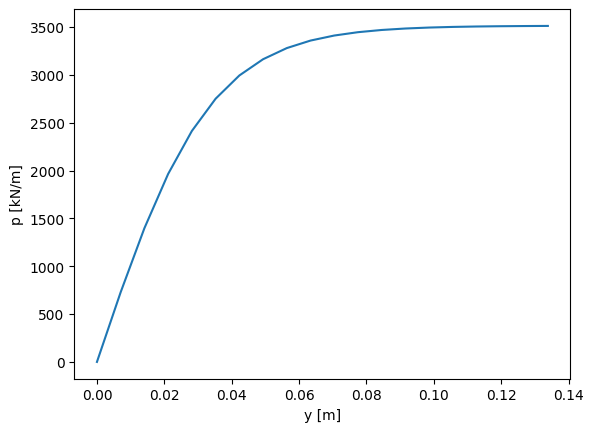

In [2]:
# import p-y curve for api_sand from openpile.utils
from openpile.utils.py_curves import api_sand

y, p = api_sand(
    sig=50,  # vertical stress in kPa
    X=5,  # depth in meter
    phi=35,  # internal angle of friction
    D=5,  # the pile diameter
    below_water_table=True,  # use initial subgrade modulus under water
    kind="static",  # static curve
)

# create a plot of the results with Matplotlib
import matplotlib.pyplot as plt

plt.plot(y, p)
plt.ylabel("p [kN/m]")
plt.xlabel("y [m]")

plt.savefig("../docs/source/_static/usage/pycurves/api_sand_example_build.png")


# Example 5 - Create a Model and run an analysis 

Converged at iteration no. 1


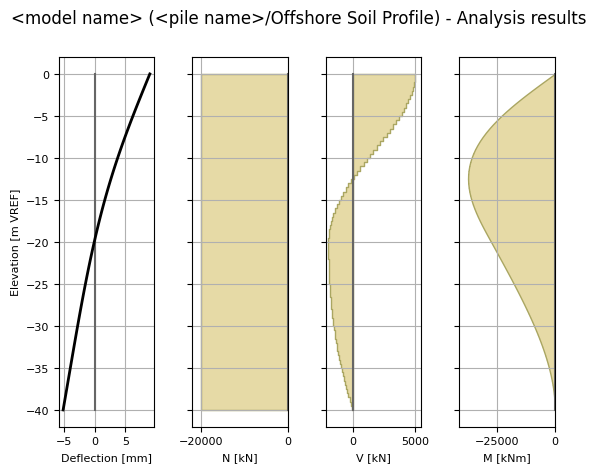

In [5]:
from openpile.construct import Pile, SoilProfile, Layer, Model
from openpile.soilmodels import API_clay, API_sand


p = Pile.create_tubular(
    name="<pile name>", top_elevation=0, bottom_elevation=-40, diameter=7.5, wt=0.075
)

# Create a 40m deep offshore Soil Profile with a 15m water column
sp = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_line=15,
    layers=[
        Layer(
            name="medium dense sand",
            top=0,
            bottom=-20,
            weight=18,
            lateral_model=API_sand(phi=33, kind="cyclic"),
        ),
        Layer(
            name="firm clay",
            top=-20,
            bottom=-40,
            weight=18,
            lateral_model=API_clay(Su=[50, 70], eps50=0.015, kind="cyclic"),
        ),
    ],
)

# Create Model
M = Model(name="<model name>", pile=p, soil=sp)

# Apply bottom fixity along x-axis
M.set_support(elevation=-40, Tx=True)
# Apply axial and lateral loads
M.set_pointload(elevation=0, Px=-20e3, Py=5e3)

# Run analysis
from openpile.analyze import winkler
import matplotlib.pyplot as plt

Result = winkler(M)

# plot the results
Result.plot()
plt.savefig("../docs/source/_static/usage/analyses_plots/main_results_plot.png")


In [4]:
Result.details()

{'converged @ iter no.': 1,
 'error [kN]': 0.21,
 'tolerance [kN]': 4.5,
 'Max. normal force [kN]': -20000.0,
 'Min. normal force [kN]': -20000.0,
 'Max. shear force [kN]': 5007.09,
 'Min. shear force [kN]': -1995.75,
 'Max. moment [kNm]': 4.7,
 'Min. moment [kNm]': -37325.66,
 'Max. settlement [m]': 0.0,
 'Min. settlement [m]': -0.002,
 'Max. deflection [m]': 0.009,
 'Min. deflection [m]': -0.005,
 'Max. rotation [rad]': -0.0,
 'Min. rotation [rad]': -0.001}